<img src="rgb_iscte_pt_horizontal_positive.png" style="max-width:33%; float: right;">
<p style="font-size: xx-large; font-weight:bold;">Projeto-Final-EDA</p>

>**Unidade curricular | Course Unit** Estrutura de Dados e Algoritmos | Data Structures and Algorithms
>
>**Professor** Luis Ramada Pereira
>
>**Curso|Course** LCD-PL -- **Ano letivo|Year** 2019/2020
>
>**Autores/Authors**
>
>     | Catarina Castanheira | nº 92478 |
>     | João Martins         | nº 93259 |
>     | Joel Paula           | nº 93392 |
>
>
>07-06-2020

# 0. Introdução

Um grafo é uma maneira de representar relacionamentos existentes entre pares de objetos. Ou seja, um grafo é um conjunto de objetos, chamados vértices, juntamente com uma coleção de conexões em pares entre elas, chamadas arestas (Goodrich _et al_ , 2013).
Estes grafos são compostos por uma rede de vértices (_nodes_) e arestas (_edges_). 
As arestas podem ser direcionadas ou não direcionadas, caso sejam direcionadas diz-se que o grafo é um dígrafo ou grafo dirigido, caso contrário diz-se que o grafo é um grafo não dirigido. Se o grafo tiver arestas dirigidas e arestas não dirigidas diz-se que o grafo é um grafo misto (_mixed graph_).
Os vértices do grafo são frequentemente denominados de _end points_ da aresta. Se o grafo for dirigido, o primeiro _end point_ é denominado de origem e o outro, destino (Goodrich _et al_, 2013).

Os grafos são uma representação muito útil na resolução de diversos problemas típicos de vários domínios, como sejam mapeamento, transporte, redes de computadores, engenharia elétrica, e logística, por exemplo. Também são usados para alguns algoritmos de manipulação de imagem.

O desafio deste projeto é perceber ou detalhar esta utilidade que referimos através de duas aplicações importantes. Por um lado a partição de um grafo (parte 1) e por outro lado a determinação do caminho mais curto entre dois dos seus vértices (parte 2).

# 1. Parte 1 - Partição do Grafo

Pretende-se analisar um grafo e determinar qual o número mínimo de arestas a remover, se quisermos separar o grafo em duas partes desconexas e cada uma de uma dimensão significativa.

Este problema é típico na análise de robustez de redes, como redes elétricas ou redes de transportes, quer numa perspetiva de “ataque“, quer numa perspetiva de defesa da rede. Também pode ser usado para análise de densidade.

Dividindo a rede em dois, quanto maior o número de cortes necessários em relação ao produto do número de nós dos dois clusters resultantes, maior a robustez.

Para este exercício específico usamos a conhecida rede de metro de Londres (_London Tube_), que possui 302 estações.

A partição de grafos é um problema complexo, de complexidade exponencial ou NP-Completo (Demmel, 2009). O caso da divisão em dois de um grafo de N vértices apresenta $\frac{N!}{((N/2)!)^2}$ possibilidades (Demmel, 2009). É um número que tende rapidamente para $+\infty$! Para o caso específico das 302 estações, é um número com mais de 600 dígitos!

Portanto, este é o tipo de problema que exige um algoritmo.

Partimos de Gonina, Ray e Su (2020), conforme sugerido pelo enunciado do trabalho, para analisar os diversos algoritmos disponíveis. Considerou-se também que este é um problema pequeno, com um grafo sem simetrias e com relativa dispersão geográfica uniforme na zona central. Acabámos por selecionar o método sugerido de espectro de bisseção (_Spectral Bisection_), pela sua qualidade e simplicidade de implementação para o problema analisado.

Este método foi desenvolvido por Fiedler em 1970 e baseia-se na computação do vetor próprio da matriz laplaciana do grafo em questão (Gonina, Ray e Su, 2020).

O objectivo é obter o mínimo número de cortes ou a mínima "ratio cut partition".

## 1.1. Metodologia

O objectivo é minimizar a função de _Fiedler_, definida através de: $$f = \frac{c}{\mid G1\mid * \mid G2\mid}$$
Em que $\mid G1\mid$ e $\mid G2\mid$ correspondem ao número de vértices do grafos obtidos pela bissecção do grafo inicial e $c$ corresponde ao número de cortes necessários para separar ambos os grafos. É fácil perceber que quanto mais equilibrados forem os dois subgrafos maior será o denominador desta fração, o que é inversamente propocional ao rácio de corte. Embora o rácio seja diretamente proporcional ao número de cortes necessários à bissecção, estes teriam de ser em grande número para o valor se aproximar de 1.

Explicação do algoritmo selecionado:

De modo a fazer uma partição do grafo, em que o número de vértices é o mais possível equilibrado entre os dois subgrafos, minimizando o número de arestas que conectam os dois, recorremos ao algoritmo _Spectral Bisection_, desenvolvida por Fiedler em 1970. Este algoritmo é baseado na computação dos vectores próprios sobre a matriz Laplaciana que representa o grafo.

No entanto este algoritmo só nos permite chegar a aproximações de partições de grafos ótimas (não é possível encontrar a bissecção ideal porque é um _Problema NP-Completo_, ou seja, nenhum algoritmo de solução eficiente foi encontrado para a bissecção ideal).

Método (segundo Gonina, Ray e Su 2020):

 - Abrir o documento, importar o ficheiro;

 - Construir as classes / estruturas de dados para armazenar a informação da rede de metropolitano de Londres, em que vértices = estações, arestas = ligações entre pares de estações; São definidas as classes Grafo, Vértice, Aresta, Estação;

 - Implementação do algoritmo de Bissecção Espectral começa com a construção de uma matriz Laplaciana para representar o grafo (aqui a matriz é construída directamente, sem recorrer a operações de soma / subtracção de matrizes e sem utilização de matriz de adjacência e de matriz diagonal;

 - Construir uma matriz Nula 302 x 302 (correspondente ao número de estações);

 - Inserir, por meio de ciclos que atravessam a matriz o valor -1 nos índices ij (que representam a existência de uma ligação entre a estação i e a estação j); inserir em cada índice i=j o grau do vértice, que simboliza o número de ligações a essa estação; os restantes elementos mantêm o valor zero;

 - Determinar o segundo valor próprio da matriz Laplaciana e de seguida obter o vector próprio correspondente;

 - Construir dois grafos para armazenarem cada conjunto de vértices consequentes da partição do original;

 - Para cada elemento do vector próprio (que corresponde por sua vez a um vértice específico), se esse elemento for menor que zero, o vértice correspondente será inserido no subgrafo 1, se for maior que zero o vértice será inserido no subgrafo 2;

 - Para calcular o corte mínimo do grafo: teremos de determinar se existiu um corte nas arestas que ligam cada duas estações (vértices); para isto, basta verificar se os vértices incidentes se encontram cada um num subgrafo diferente. Se sim, então estamos perante um corte no grafo. Contar o número de cortes.


## 1.2. Execução - Construindo o algoritmo

### 1.2.1. Livrarias usadas
Nesta parte do trabalho foram utilizadas as seguintes livrarias de python:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O Pandas é usado para importação de dados.
O Numpy é usado para tratamento de matrizes.
O Matplotlib para representação gráfica dos grafos.

### 1.2.2. Ficheiros de dados 
Os ficheiros de dados utilizados:

* [`LondonTube/london.stations.txt`](LondonTube/london.stations.txt) - contém os dados das estações
* [`LondonTube/london.connections.txt`](LondonTube/london.connections.txt) - contém os dados das ligações entre estações

Como primeiro passo, lêem-se os ficheiros, para ficar claro que dados estão ou não disponíveis.

In [17]:
df_stations = pd.read_csv("LondonTube/london.stations.txt")
df_stations.head()

,id,latitude,longitude,name,display_name,zone,total_lines,rail
0,1,51.5028,-0.2801,Acton Town,ActonTown,3.0,2,0
1,2,51.5143,-0.0755,Aldgate,NaN,1.0,2,0
2,3,51.5154,-0.0726,Aldgate East,AldgateEast,1.0,2,0
3,4,51.5107,-0.0130,All Saints,AllSaints,2.0,1,0
4,5,51.5407,-0.2997,Alperton,NaN,4.0,1,0


In [18]:
df_connections = pd.read_csv("LondonTube/london.connections.txt")
df_connections.head()

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2


### 1.2.3. A classe de grafo

Para implementação do grafo, usámos uma estrutura em mapas de adjacência. A classe mantém um dicionário de vértices e cada vértice contêm um dicionário de pares vértices adjacentes / arestas. Usámos este tipo de implementação por ter uma boa eficiência na ocupação de memória, com baixo grau de complexidade. Adicionalmente, facilita a manipulação necessária durante a execução do algoritmo. A implementação é apenas a suficiente para a execução deste projeto.

Para além da classe `Graph`, que implementa o grafo, existem as classes auxiliáres `Vertex` e `Edge`, que implementam um vértice e uma aresta, respetivamente.
Estas classes implementam os métodos mágicos `__str()__` e `__repr()__`, para facilitarem o debug rápido de estados do grafo (e do programa).

In [19]:
class Vertex:
    def __init__(self, name=None):
        self.__name = name

    @property
    def name(self):
        return self.__name

    def __str__(self):
        return f"{self.__name}"

    def __repr__(self):
        return str(self)


class Edge:
    def __init__(self, origin, destination, name=None):
        self.__name = name
        self.__vertices = (origin, destination)

    @property
    def name(self):
        return self.__name

    @property
    def origin(self):
        return self.__vertices[0]

    @property
    def destination(self):
        return self.__vertices[1]

    def endpoints(self):
        return self.__vertices

    def opposite(self, v):
        return next(i for i in self.__vertices if i is not v)

    def __str__(self):
        return f"{self.__name if self.__name else ''}: ({self.__vertices[0].name} -- {self.__vertices[1].name})"

    def __repr__(self):
        return str(self)


class Graph:
    def __init__(self):
        self.__vertices = {}

    def insert_vertex(self, v):
        self.__vertices[v] = {}

    def vertices(self):
        return self.__vertices.keys()

    def vertex_count(self):
        return len(self.__vertices)

    def insert_edge(self, e):
        self.__vertices[e.origin][e.destination] = e
        self.__vertices[e.destination][e.origin] = e

    def edges(self):
        return {
            edge
            for children in self.__vertices.values()
            for edge in children.values()
        }

    def edge_count(self):
        return len(self.edges())

    def get_edge(self, u, v):
        res = None
        if u in self.__vertices:
            if v in self.__vertices[u]:
                res = self.__vertices[u][v]
        return res

    def degree(self, v):
        # print(self.__vertices[v].keys())
        return len(self.__vertices[v].keys())

    def remove_vertex(self, v):
        # remove connections to this vertex
        for o in self.__vertices[v]:
            del self.__vertices[o][v]
        del self.__vertices[v]

    def remove_edge(self, e):
        del self.__vertices[e.origin][e.destination]
        del self.__vertices[e.destination][e.origin]

Para representação de um vértice do tipo estação foi criada uma classe `Station` que estende a classe `Vertex`, acrescentando as características necessárias neste caso: id, latitude e longitude da estação.

In [20]:
class Station(Vertex):
    def __init__(self, id, name, latitude, longitude):
        super().__init__(name=name)
        self.__id = id
        self.__latitude = latitude
        self.__longitude = longitude

    @property
    def id(self):
        return self.__id

    @property
    def latitude(self):
        return self.__latitude

    @property
    def longitude(self):
        return self.__longitude
    
    def geo_ref(self):
        return (self.__latitude, self.__longitude)

    def __str__(self):
        return f"[{self.id}] {self.name} ({self.latitude}, {self.longitude})"

    def __repr__(self):
        return str(self)

### 1.2.4. Criando o grafo
A intenção é ler os ficheiros de dados de estações e suas conexões, e com eles criar um grafo, para facilitar a sua análise posterior.
Como estrutura auxiliar, usamos um dicionário, onde vão sendo colocadas as estações criadas a partir dos dados, para facilitar posteriormente a criação das arestas / conexões.

De forma análoga, é usado um dicionário para agregar as arestas criadas a partir dos ficheiros de dados, como forma expedita de garantir a eliminação de conexões "repetidas", tal como vêm nos ficheiros de dados. Só depois de colocadas as conexões no dicionário auxiliar é que são adicionadas ao grafo.

In [21]:
gr = Graph()

train_stations = {}
for ts in df_stations.itertuples():
    s = Station(id=ts.id,
                name=ts.name,
                latitude=ts.latitude,
                longitude=ts.longitude)
    gr.insert_vertex(s)
    train_stations[s.id] = s

connections = {}
for cn in df_connections.itertuples():
    key1 = (cn.station1, cn.station2)
    key2 = (cn.station2, cn.station1)
    if key1 not in connections.keys() and key2 not in connections.keys():
        c = Edge(train_stations[cn.station1], train_stations[cn.station2])
        connections[key1] = c

for e in connections.values():
    gr.insert_edge(e)

print("Stations: ", gr.vertex_count())
print("Connections: ", gr.edge_count())

Stations:  302
Connections:  349


Para facilitar a apreensão do trabalho executado, foi incluida uma rotina de visualização:

In [22]:
from math import cos, radians
from statistics import mean

plt.rcParams['figure.dpi'] = 150

def plot_edges(lst, color="xkcd:royal blue", marker="o", markersize=1, linewidthwidth=0.5, showgraph=False):
    for e in lst:
        xs = [e.origin.longitude, e.destination.longitude]
        ys = [e.origin.latitude, e.destination.latitude]
        plt.plot(xs, ys, c=color, marker=marker, markersize=markersize, linewidth=linewidthwidth)

    if showgraph:
        # Mercator projection aspect ratio approximation at this central latitude 
        mercator_aspect_ratio = 1/cos(radians(mean(ys)))
        ax = plt.gca()
        ax.set_aspect(mercator_aspect_ratio)
        plt.axis('off')
        plt.show()

Esta rotina permite visualizar o mapa a partir da lista de arestas. Dá a possibilidade de alterar a cor das linhas e pontos usados, a sua espessura e o tipo de marcador usado para as estações. O parâmetro `showgraph` permite chamar repetidas vezes a rotina (por exemplo, para adicionar vários grafos ao mesmo mapa) e controlar quando finalmente o resultado é apresentado.

Utilizando para visualizar o grafo da rede inteira:

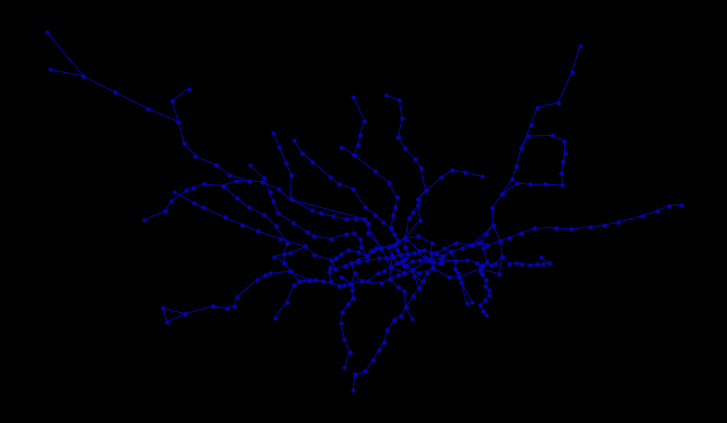

In [23]:
plot_edges(gr.edges(), showgraph=True)

O próximo passo é determinar a matriz Laplaciana e obter o segundo vector próprio.

A determinação da matriz laplaciana é simples: construir uma matriz simétrica com o número de estações/vértices, em que nas interceções de duas estações que estão ligados está o valor `-1` e nas interceções da estação consigo própria está o grau da estação (o número de arestas incidentes ou de conexões).
É usada uma lista auxiliar das estações / vértices, para poder referir-se à estação pela sua ordem, tal como na matriz.

Uma vez construida a matriz, o módulo `linalg` da livraria Numpy providencia a função `eig()` que devolve um array de "_eigenvalues_" (valores próprios ou característicos) e outro dos correspondentes vetores próprios ("_eigenvectors_"). Uma vez obtidos, é necessário descobrir qual é o segundo valor próprio, ordenando o array por ordem crescente. Ao obter a posição do segundo valor próprio fica determinado qual é o correspondente vetor próprio, que será usado na sequência do algoritmo para determinar o corte do grafo em dois.

In [24]:
m_L = np.zeros([gr.vertex_count(), gr.vertex_count()], int)
vertices = list(gr.vertices())

for i in range(m_L.shape[0]):
    for j in range(m_L.shape[1]):
        if i == j:
            m_L[i, j] = gr.degree(vertices[i])
        elif gr.get_edge(vertices[i], vertices[j]):
            m_L[i, j] = -1

# Get EigenVector
eigenvalues, v = np.linalg.eig(m_L)
eigen_index = np.argsort(eigenvalues)[1]
ev2nd = v[:, eigen_index]

Seguindo na aplicação do algoritmo, usamos o vetor próprio para separar o grafo em dois, resultado daí os grafos _G1_ e _G2_. O critério de separação é o valor do vetor próprio para a posição daquela estação / vértice ser ou não inferior a zero.

In [25]:
g1 = Graph()
g2 = Graph()

for i in range(ev2nd.size):
    if ev2nd[i] < 0:
        g1.insert_vertex(vertices[i])
    else:
        g2.insert_vertex(vertices[i])

g1_count = g1.vertex_count()
g2_count = g2.vertex_count()

print("G1: ", g1_count, "stations")
print("G2: ", g2_count, "stations")

G1:  130 stations
G2:  172 stations


Obtemos dois grafos separados: G1 contendo 130 vértices / estações  e G2 contendo 172 vértices / estações.

O próximo passo é verificar o número de cortes que são efetuados para esta divisão do grafo inicial. Para isso são tomados todas as arestas / conexões do grafo inicial e é verificado se ambos os vértices incidentes estão dentro do mesmo _cluster_ após a divisão (G1 ou G2) - caso em que a aresta é imediatamente associados a esse grafo - ou se os seus vértices incidentes estão em _clusters_ separados - caso em que é considerada uma aresta de corte.

In [26]:
# Edges with one vertex/station in g1 and another one in g2
e_to_cut = []
for e in gr.edges():
    if all(ver in g1.vertices() for ver in e.endpoints()):
        g1.insert_edge(e)
    elif all(ver in g2.vertices() for ver in e.endpoints()):
        g2.insert_edge(e)
    else:
        e_to_cut.append(e)

print("Number of connections in G1:", g1.edge_count())
print("Number of connections in G2:", g2.edge_count())
print("Number of cuts:", len(e_to_cut))
print("Minimum Cut Ratio:", len(e_to_cut) / (g1_count * g2_count))


Number of connections in G1: 145
Number of connections in G2: 196
Number of cuts: 8
Minimum Cut Ratio: 0.00035778175313059033


Visto que construimos os grafos das redes separadas, podemos visualizar a rede e os cortes. Usamo a seguir o azul para G1, o verde para G2 e o vermelho para os cortes.

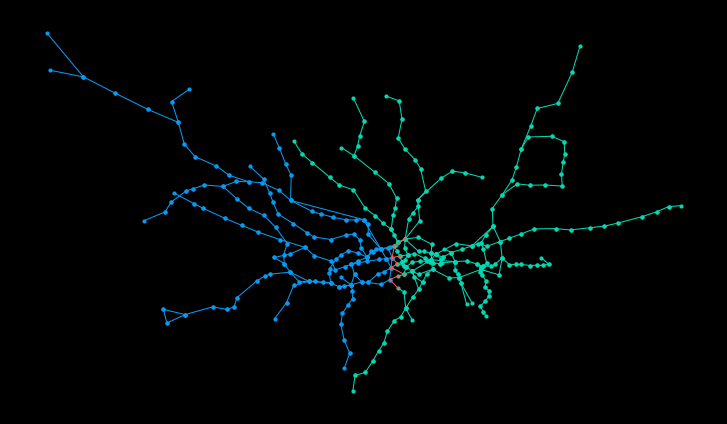

In [27]:
plot_edges(g1.edges(), color="xkcd:azure")
plot_edges(g2.edges(), color="xkcd:aquamarine")
plot_edges(e_to_cut, color="xkcd:coral", marker="+", markersize=0.9, showgraph=True)

Os cortes efetuados:

In [28]:
for e in e_to_cut:
    print(e)

: (Oxford Circus -- Picadilly Circus)
: (Green Park -- Westminster)
: (St. James's Park -- Victoria)
: (Green Park -- Picadilly Circus)
: (Pimlico -- Victoria)
: (Oxford Circus -- Tottenham Court Road)
: (Oxford Circus -- Warren Street)
: (Euston Square -- King's Cross St. Pancras)


## 1.3. Resultados

Através deste algoritmo conseguimos obter duas redes completamente ligadas, com apenas 8 cortes. O resultado pode ser verificado no mapa da rede, onde estão assinalados os cortes efetuados.
![tube-map.gif - mapa da rede de metro de Londres com os cortes assinalados](tube-map.gif)
Nota: a rede de metro não inclui as linhas de comboio representadas a duas cores no mapa.

Observando o _Minimum Cut Ratio_ de 0.0004, podemos concluir que a robustez da rede de metro de Londres é muito baixa, uma vez que necessita de apenas 8 cortes para a separar em dois grandes _clusters_, impedindo a circulação de passageiros entre duas metades da rede metropolitana.

# 2. Parte 2 - Caminho Mais Curto

Nesta segunda parte do projecto, foi traçado como objectivo determinar o caminho mais curto entre dois vértices do grafo que representa a rede de metropolitano de Londres. Dados uma estação de origem, uma estação de destino, e o período do dia a que dirá respeito a simulação da viagem, será estruturado um algoritmo que retornará o tempo de viagem mais curto entre esses dois pontos, assim como o caminho percorrido (quais as estações que definem o percurso mais curto). Na resolução deste problema, será necessário considerarmos o grafo que representa a rede de metro como um grafo pesado e dirigido, pois só desta forma será possível fornecer um critério de escolha adequado ao algoritmo para decidir sobre qual das arestas incidentes seguir caminho – o objectivo será que, de entre diversas possibilidades, seja escolhido o percurso entre a origem e destino cuja soma dos tempos seja a menor possível. O peso das arestas do grafo será então a estrutura que “informa” sobre o tempo que demora a percorrer cada duas estações (vértices) ligadas. Este tempo de transição entre estações está disponível nos ficheiros de dados fornecidos. Para trazer um pouco mais de realismo à simulação, também será considerado o tempo que uma pessoa demorará a mudar de linha de metro, caso assim seja necessário; para cada episódio então de transição de plataforma e também de espera pelo outro comboio, são adicionados 10 minutos ao tempo total do percurso, influenciando este tempo também as decisões tomadas pelo algoritmo.

Para a determinação do caminho mais curto entre duas estações (escolhidas pelo utilizador), além da necessária inclusão de um grafo pesado para representar a rede, outras estruturas de dados são também desenvolvidas. Ao longo da implementação do algoritmo será detalhada a pertinência de cada estrutura.

## 2.1. Metodologia

Para encontrarmos o caminho mais curto num grafo pesquisámos sobre BFS (Breadth First Search) e como se aplicaria neste caso. Percebendo que o grafo que iriamos utilizar é pesado e as arestas têm diferentes pesos, é recomendado usar o algoritmo de Dijkstra. O algoritmo BFS por si só é mais adequado para _uniform – cost search_, ou seja, para grafos em que o peso das arestas é uniforme.

Um dos algoritmos usados para encontrar o caminho mais curto e dos mais populares pela sua abordagem ao problema em questão é o algoritmo de Dijkstra.
Este algoritmo resolve o problema do caminho mais curto para qualquer grafo dirigido com pesos positivos e encontra o caminho mais curto entre um vértice dado como origem e outro dado como destino no grafo, assumindo que os vértices são alcançáveis desde o vértice da origem.
Caso os pesos sejam negativos, o algoritmo produz resultados incorretos e por isso será mais acertado escolher outros algoritmos, mas para o tipo de grafo em questão, o algoritmo de Dijkstra é o mais eficiente (Goodrich _et al_, 2013).

O algoritmo de Dijkstra utiliza uma BFS, em níveis sucessivos a partir da origem, avaliando os pesos das arestas adjacentes ao vértice em análise.

Este algoritmo tem várias aplicações na modelação de muitos domínios, incluindo mapeamento, transporte, redes de computadores, e engenharia elétrica.
Um dos exemplos das suas aplicações são as empresas de logística que podem usar este algoritmo para desenvolver um sistema que encontra o caminho mais curto entre armazéns e destinos para evitar desperdícios de tempo nas suas viagens.

A pesquisa ou travessia do grafo em BFS tem uma complexidade temporal de $O(n+m)$ (Goodrich _et al_, 2013), em que $n$ é o número de vértices e $m$ é o número de arestas. Embora a complexidade seja similar a uma travessia em profundidade (DFS - _Depth First Search_), esta forma é mais apropriada para o cálculo de menores distâncias (Goodrich _et al_, 2013).

O algoritmo baseia-se na premissa de que a melhor solução é a soma das melhores soluções locais, em cada nível.

A complexida da BFS, como já dissemos, é $O(n+m)$, sendo que só contam os nós e arestas que sejam alcançáveis a partir do vértice de origem. No entanto, temos de ter em conta a utilização de um _Heap_ binário como fila de prioridade para obter o seguinte vértice mais próximo. Isso é feito por cada aresta e vértice, elevando a complexidade para $O((n+m) log(n))$.

### 2.1.1 Livrarias usadas

Na realização da segunda parte do trabalho, recorremos a mais algumas livrarias e também decidimos separar as nossas próprias classes em módulos independentes.

In [29]:
from enum import Enum
from haversine import haversine, Unit
from collections import namedtuple
from Graph import Graph, Edge #, Vertex
from TrainGraph import Station, Connection, peak_type, TrainGraph

Na realização da segunda parte do trabalho, recorremos às bibliotecas _Enum_, para criar classes de enumeração, que nos simplificam a utilização e leitura do código e à livraria _Haversine_, para evitar ter de contruir a função de cálculo de distância entre dois pontos na superfície do globo terrestre.

Graph é a nossa implementação de grafo simples e os seus vértices e arestas.
TrainGraph é a nossa implementação de um grafo pesado, específico para esta situação, em que os pesos vêm dos tempos de viagem médios importados a partir de ficheiros csv.

Código detalhado em:
* [`Graph.py`](Graph.py) - Classes base de grafo com matriz de adjacência, vértices e arestas, conforme mostrado acima
* [`DiGraph.py`](DiGraph.py) - implementação de um grafo dirigido
* [`TrainGraph.py`](TrainGraph.py) - implementação do grafo pesado utilizado para esta parte do trabalho, explicitamente para o caso de linhas de metro/comboio
* [`BinaryHeap.py`](BinaryHeap.py) - implementação de um heap binário genérico, usado como base da fila de prioridades no algoritmo de cálculo de caminho mais curto
* [`UpdatableBinaryHeap.py`](UpdatableBinaryHeap.py) - implementação de um heap binário, cujos nós são atualizaveis, usado como fila de prioridades no algoritmo de cálculo de caminho mais curto




### 2.1.2. As classes de Grafo Dirigido e Pesado

Implementámos uma nova classe de grafo, que possibilita ter arestas direcionadas. Isto para modelar os casos em os tempos de viagem entre estações são diferentes dependendo da direção.

A grande diferença para o grafo anterior é que existem dois mapas de adjacências: um para as arestas de entrada e outro para as arestas de saída.

```python

class DiGraph:
    def __init__(self, directed=False):
        self.__directed = directed
        self.__vertices_out = {}
        if directed:
            self.__vertices_in = {}
        else:
            self.__vertices_in = self.__vertices_out
```

Para além disso, foi necessário implementar um novo método que permite obter as arestas todas de um vértice:

```python
    def get_incident_edges(self, v, outgoing=True):
        return self.__vertices_out[v].values() if outgoing else self.__vertices_in[v].values()

```

Para as arestas pesadas de ligação entre estações, precisámos adicionar atributos de distância e tempos de viagem.

```python
class Connection(Edge):
    def __init__(self, origin, destination, distance_km, off_peak_mins, am_peak_mins, inter_peak_mins, line, name=None):
        super().__init__(origin=origin, destination=destination, name=name)
        self.distance_km = distance_km
        self.__times = {peak_type.OFF_PEAK: off_peak_mins, 
                        peak_type.AM_PEAK: am_peak_mins, 
                        peak_type.INTER_PEAK: inter_peak_mins}
        self.__lines = {line}

```

Também criámos um conjunto (_set_) das linhas que viajam nessa aresta, para auxiliar no cálculo de tempos adicionais de transferência entre linhas/plataformas.

O peso da aresta é determinado através do método _get_time()_:
```python
    def get_time(self, peak, lines):
        line_change_time = 0
        if not any(line for line in lines if line in self.__lines):
            line_change_time = 10
        return self.__times[peak] + line_change_time
```
Este método recebe o período horário pretendido, de entre os 3 disponíveis, bem como as linhas de origem, para determinar se é necessário fazer um transbordo ou não.

> Para o tempo de transbordo, optámos por utilizar um tempo médio constante de 10 minutos, tal como sugerido no enunciado.



### 2.1.3. Ficheiros de dados

Para além dos dois ficheiros usados na Parte 1 (estações e conexões entre estações), vamos usar também:
* [`LondonTube/interstation.csv`](LondonTube/interstation.csv) - distâncias e tempos de ligação entre estações, por cada sentido e por cada linha
* [`LondonTube/london.lines.txt`](LondonTube/london.lines.txt) - as linhas de metropolitano

Como primeiro passo, lêem-se os ficheiros, para ficar claro que dados estão ou não disponíveis.

Nota: intersation.csv é a versão 3.

In [30]:
df_interstations = pd.read_csv("LondonTube/interstation.csv", names=["line", "from_id", "to_id", "distance", "off_peak", "am_peak", "inter_peak"], skiprows=1)
print("Distâncias e tempos entre estações:", len(df_interstations.index))
df_interstations.head()

Distâncias e tempos entre estações: 743


,line,from_id,to_id,distance,off_peak,am_peak,inter_peak
0,1,114,140,1.74,2.23,2.50,2.50
1,1,140,237,1.40,1.88,2.00,2.00
2,1,237,185,0.90,1.50,1.50,1.50
3,1,185,281,1.27,1.92,2.06,2.06
4,1,281,246,1.71,2.23,3.13,3.13


In [31]:
df_lines = pd.read_csv("LondonTube/london.lines.txt")
print("Linhas:", len(df_lines.index))
df_lines.head()

Linhas: 13


,line,name,colour,stripe
0,1,Bakerloo Line,AE6017,NaN
1,3,Circle Line,FFE02B,NaN
2,6,Hammersmith & City Line,F491A8,NaN
3,7,Jubilee Line,949699,NaN
4,11,Victoria Line,0A9CDA,NaN


### 2.1.4. Criando o grafo pesado

Começamos por ler as várias linhas de metro para um dicionário, pois serão de utilidade no futuro.

In [32]:
TrainLine = namedtuple("TrainLine", "id, name, color, stripe_color")
london_lines = {}
for l in df_lines.itertuples():
    london_lines[l.line] = TrainLine(l.line, l.name, l.colour, l.stripe)

Vamos começar por criar o grafo e adicoinar-lhe as estações, mantendo um dicionário de estações, para auxiliar no decorrer do carregamento do grafo.

In [33]:
subway_wgr = TrainGraph()

# read train stations    
train_stations = {} 
for ts in df_stations.itertuples():
    s = Station(id=ts.id,
                name=ts.name,
                latitude=ts.latitude,
                longitude=ts.longitude)
    subway_wgr.insert_vertex(s)
    train_stations[s.id] = s

print("Stations: ", subway_wgr.vertex_count())

Stations:  302


De seguida carregamos todas as conexões a partir dos ficheiros de `interstation.csv` e também do `london.connections.txt`. Tentamos aproveitar todos os dados que têm. No caso do `interstation`, temos as linhas, as distâncias e os tempos. No caso do `london.connections`, temos as linhas e apenas os tempos, em minutos.

In [34]:
# now read all the inter stations from file and add them as connections to the intermediate dictionary 
connections = {}
for cn in df_interstations.itertuples():
    key = (cn.from_id, cn.to_id)
    if key not in connections.keys():
        c = Connection(train_stations[cn.from_id], train_stations[cn.to_id], 
            cn.distance, cn.off_peak, cn.am_peak, cn.inter_peak, cn.line)
        connections[key] = c
    else:
        connections[key].add_line(cn.line) 

# now read all the connections from file and add them to the intermediate dictionary
for cn in df_connections.itertuples():
    key = (cn.station1, cn.station2)
    if key in connections.keys():
        c = connections[key]
        if cn.line not in c.lines:
            # connection already exists - add the line
            c.add_line(cn.line)
    else:
        c = Connection(train_stations[cn.station1], train_stations[cn.station2], 0, 
            cn.time, cn.time, cn.time, cn.line)
        connections[key]= c

# Now check for any missing opposite direction edges
for cn in connections.values():
    # correct non existing distance/time
    if cn.distance_km == 0:
        distance_kms = haversine(cn.origin.geo_ref(), cn.destination.geo_ref())
        cn.distance_km = distance_kms
        if cn.get_time(peak_type.OFF_PEAK, cn.lines) == 0:
            time_mins = round(distance_kms * 2, 4) # distance x 60mins / 30km
            cn.set_time(peak_type.OFF_PEAK, time_mins)
            cn.set_time(peak_type.AM_PEAK, time_mins)
            cn.set_time(peak_type.INTER_PEAK, time_mins)
    # check opposite exists or create otherwise
    key_opposite = (cn.destination.id, cn.origin.id)
    if not key_opposite in connections.keys():
        line = list(cn.lines)[0]
        c = Connection(cn.destination, cn.origin, cn.distance_km, 
            cn.get_time(peak_type.OFF_PEAK, cn.lines), cn.get_time(peak_type.AM_PEAK, cn.lines), 
            cn.get_time(peak_type.INTER_PEAK, cn.lines), line)
        for line in cn.lines:
            c.add_line(line)
        subway_wgr.insert_edge(c)

# Insert edges into graph
for edge in connections.values():
    subway_wgr.insert_edge(edge)

print("Stations: ", subway_wgr.vertex_count())
print("Connections: ", subway_wgr.edge_count())

Stations:  302
Connections:  704


Nos casos em que a conexão numa direção não existia, criamos a partir da existente na outra direção, copiando distâncias, linhas e tempos.

Nos casos em que não existiam valores para as distâncias, foram calculados a partir das suas coordenadas, tendo em conta a curvatura terrestre. Nos casos em que os tempos de viagem não existiam, foram inferidos a partir da distância, considerando uma velocidade média de viagem de 30 km/h.

## 2.2. Algoritmo de Caminho mais curto

O algoritmo de cálculo de menor distância entre dois vértices do grafo pesado que usámos é o algoritmo de Dijkstra.

O algoritmo começa pelo vértice de origem e vai construindo uma "nuvem" iterativamente, trazendo para esta o vértice mais próximo do nível seguinte. Faz isto até que não existam mais vértices por visitar no grafo ou que estes não tenham ligação aos que estão na nuvem. Os vértices são colocados numa fila prioritária - para o qual usamos um _Heap_ binário mínimo - cuja chave é o peso (neste caso, o tempo de viagem).

```python
    def shortest_path(self, origin, destination, peak):
        """"
        Calculates shortest path from origin station to destination station.
        Returns a tuple (time, path), where:
         `time` is the path's time in minutes;
         `path` is a list with Stations, ordered from origin to destination.
        """
        cloud = {}
        paths = {}
        priority_queue = UpdatableBinaryHeap()

        priority_queue.add(0, (origin, None))

        while not priority_queue.is_empty():
            d, (v, incoming_edge) = priority_queue.first()
            if v not in paths.keys():
                paths[v] = None
            cloud[v] = d
            if v is destination:
                break
            for edge in self.get_incident_edges(v):
                u = edge.opposite(v)
                sc_pair = (u, edge)
                if u not in cloud:
                    if incoming_edge:
                        lines = incoming_edge.lines
                    else:
                        lines = edge.lines
                    weight = edge.get_time(peak, lines)
                    if priority_queue.get_key(sc_pair) is None or priority_queue.get_key(sc_pair) > d + weight:
                        paths[u]= v
                        priority_queue.update_or_add(d + weight, sc_pair)

        return cloud[v], TrainGraph.__get_path(paths, destination)

    @staticmethod
    def __get_path(path_dict, origin):
        if path_dict[origin] is None:
            return [origin]
        else:
            return TrainGraph.__get_path(path_dict, path_dict[origin]) + [origin]

```

Um ponto interessante, é que este Heap precisa de ser atualizado, pois um mesmo vértice pode ser alcançado por diversos caminhos, nem todos com a mesma distância, mas nós só pretendemos ficar com a distância mais curta.

Isso obrigou-nos a criar um "UpdatableHeap", cuja principal característica é ter um método que permite adicionar ou atualizar um elemento:
```python
    def update_or_add(self, key, element):
        if element not in self.__locators.keys():
            self.add(key, element)
        else:
            position = self.__locators[element]
            self._bubble(position)

```

O Heap tem internamente um mapa entre o elemento e o seu índice na memória interna, para saber que elemento atualizar.
Uma vez obtida a posição, é avaliado se este nó deve subir ou descer na hierárquia, consoante a sua nova chave e o valor da chave do seu nó pai:
```python
    def _bubble(self, position):
        parent_pos = self._parent(position)
        parent = self._heap[parent_pos]
        if position > 0 and self._heap[position]._key < parent._key:
            self._bubble_up(position)
        else:
            self._bubble_down(position)
```

No final do algoritmo atravessar o grafo, teriamos a distância de todos os vértices ao alcance da origem na variável _cloud_. No entanto, decidimos terminar assim que colocamos na _cloud_ o vértice de destino, visto que, neste contexto, continuar a preencher a nuvem de distâncias à origem não teria utilidade.

Finalmente, usamos um dicionário `paths` para guardar o vértice de origem de cada vértice colocado na nuvem, para facilitar posteriormente a reconstrução do caminho, diminuindo a complexidade desse algoritmo.

## 2.3. Resultados

Antes de saltarmos já para os resultados, decidimos criar uma forma de visualizar os resultados diretamente num mapa, com possibilidade de o utilizador manipular o mapa (aproximar/afastar, mover o centro) e verificar a viagem.

Para isso, usámos a biblioteca `folium`, que abstrai a complexidade de carregar os mapas e desenha-los. A função que construimos parte do grafo, marcando no mapa todas as estações e desenhando todas as linhas entre as mesmas, desenhando por cima o caminho encontrado.

In [35]:
# Use either to install folium on your system if you dont have it yet:
#!pip install folium
#!conda install folium -c conda-forge
import folium
from folium import plugins, features

def show_path_on_map(line_graph, path):
    underground_icon_url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Underground.svg"
    london_loc = (51.57172, -0.18)              # initial center in London
    my_map = folium.Map(location=london_loc)    # create map
    plugins.ScrollZoomToggler().add_to(my_map)  # Turn of annoying scroll wheel zoom

    # Add markers for every station
    for station in subway_wgr.vertices():
        folium.Marker([station.latitude, station.longitude], 
                      icon=features.CustomIcon(underground_icon_url, icon_size=(16, 12)), 
                      tooltip=station.name).add_to(my_map)

    # Add line for every edge
    for line in subway_wgr.edges():
        line_map = []
        line_map.append([line.origin.latitude, line.origin.longitude])
        line_map.append([line.destination.latitude, line.destination.longitude])
        # add line names as tooltips
        tooltip = [london_lines[l].name for l in line.lines]
        folium.PolyLine(line_map, color="#0019A8", tooltip=str(tooltip)).add_to(my_map)

    # Add the path as an ant path
    line_map = []
    for s in travel_path:
        line_map.append([s.latitude, s.longitude])
    folium.plugins.AntPath(line_map).add_to(my_map)
    # folium.PolyLine(line_map, color="#DC241F").add_to(m)

    # fit map boundaries to our path
    my_map.fit_bounds(line_map)

    display(my_map)

    return my_map

Finalmente, Usando o algoritmo para calcular o caminho mais curto entre as estações de Amersham e Wimbledon e mostrando o mesmo no mapa:

In [36]:
from_station = 6
to_station = 299
travel_time, travel_path = subway_wgr.shortest_path(train_stations[from_station], train_stations[to_station], peak_type.AM_PEAK)
show_path_on_map(subway_wgr, travel_path)
print("From ", train_stations[from_station].name, "to", train_stations[to_station].name, "during AM Peak time:", round(travel_time), "minutes")


From  Amersham to Wimbledon during AM Peak time: 100 minutes


Nota: a ligação direta entre as estações de Harrow-on-the-Hill e Moor Park aparece por ser fornecida no ficheiro nas linhas 460 e 480.

### 2.3.1. Interface com o utilizador

Decidimos também, dar a possibilidade ao utilizador de selecionar as estações e horários que pretende e verificar o cálculo de caminho mais curto no seguinte bloco:

In [37]:
from ipywidgets import HBox, VBox, Box, Layout, Label, widgets as widgets
from IPython.display import display

def on_bt_click(b):
    msg_lablel.value = ""
    # Check that origin and destination are not the same
    if from_station_lst.value == to_station_lst.value:
        msg_lablel.value = "Please select different stations for origin and destination"
    else:
        msg_lablel.value = f"Calculating..."
        travel_time, travel_path = subway_wgr.shortest_path(train_stations[from_station_lst.value], 
                                                            train_stations[to_station_lst.value], peak_lst.value)
        msg_lablel.value = f"Travel time: {round(travel_time)} minutes."
        out.value = ""
        for s in travel_path:
            out.value += f"<p>{s.name}</p>\n"

peak_lst = widgets.Dropdown(
    options=[("AM Peak", peak_type.AM_PEAK), ("Inter Peak", peak_type.INTER_PEAK), 
             ("Off Peak", peak_type.OFF_PEAK)],
    value=peak_type.AM_PEAK,
)
station_options = sorted([(ts.name, ts.id ) for ts in df_stations.itertuples()])
from_station_lst = widgets.Dropdown(
    options=station_options,
    value=1,
)
to_station_lst = widgets.Dropdown(
    options=station_options,
    value=1,
)

bt = widgets.Button(
    description=" Go ",
    disabled=False,
    button_style="", # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Click me to get the shortest path between both stations",
    icon="subway", # (FontAwesome names without the `fa-` prefix)
    layout=Layout(align_items="center")
)
bt.on_click(on_bt_click)
msg_lablel = widgets.Label(value="")
out = widgets.HTML(value="", layout={'height': '100%', 'width': '100%'})

left_col = VBox([Label("Peak type:"), Label("Origin Station:"), Label("Destination Station:")])
right_col = VBox([peak_lst, from_station_lst, to_station_lst])
form_items = [
    HBox([left_col, right_col]),
    HBox([bt]),
    HBox([msg_lablel]),
    HBox([out]),
    ]
form = Box(form_items, layout=Layout(display="flex", flex_flow="column", align_items="center", width="80%"))
form

Box(children=(HBox(children=(VBox(children=(Label(value='Peak type:'), Label(value='Origin Station:'), Label(v…

# Bibliografia
Demmel, J. (2009). CS267 lecture 13 – Graph Partitioning. Obtido em 25 de Maio de 2020, de U.C. Berkeley CS267/EngC233: https://people.eecs.berkeley.edu/~demmel/cs267_Spr09/Lectures/lecture13_partition_jwd09.ppt

Gonina, K., Ray, S., & Su, B.-Y. (2020). _Graph Partitioning_. Obtido em 25 de Maio de 2020, de Berkeley Our Pattern Language: https://patterns.eecs.berkeley.edu/?page_id=571

Goodrich, M. T., Tamassia, R., & Goldwasser, M. H. (2013). Data structures and algorithms in Python.
Hoboken: John Wiley & Sons.

Kabelíková, P. (2006). _Graph Partitioning Using Spectral Methods_. (Tese). VSB - Technical University of Ostrava, República Checa. Obtido em 25 de Maio de 2020: https://pdfs.semanticscholar.org/ab34/1258fbab7b2e9a719c6bbeb96fc204356a82.pdf

Wikipédia. (2019). _Partição de grafos_. Obtido de Wikipédia: https://pt.wikipedia.org/wiki/Parti%C3%A7%C3%A3o_de_grafos
